In [54]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import torch

In [55]:
num_runs = 5
bs = [1, 16, 64, 128]

results_svrg = []
for i, b in enumerate(bs):
    results_svrg.append([])
    for run in range(num_runs):
        pickled_data = open(f"converted/svrg_runs_bs{b}_lr1e-02/{run}/train_data.pkl", "rb")
        results_svrg[i].append(pickle.load(pickled_data))

results_sgd = []
for i, b in enumerate(bs):
    results_sgd.append([])
    for run in range(num_runs):
        pickled_data = open(f"converted/sgd_runs_bs{b}_lr1e-02/{run}/train_data.pkl", "rb")
        results_sgd[i].append(pickle.load(pickled_data))

In [56]:
key = "train"
steps =  np.array(list(range(3000)))


svrg = []
for i, b in enumerate(bs):
    svrg_temp = []
    for run in range(num_runs):
        svrg_temp.append(results_svrg[i][run][key])
    svrg.append(np.array(svrg_temp)[::,::,-1:].reshape([num_runs, len(svrg_temp[0])]))

sgd = []
for i, b in enumerate(bs):
    sgd_temp = []
    for run in range(num_runs):
        sgd_temp.append(results_sgd[i][run][key])
    sgd.append(np.array(sgd_temp)[::,::,-1:].reshape([num_runs, len(sgd_temp[0])]))

In [57]:
mean_svrg = [None for _ in range(len(bs))]
std_svrg = [None for _ in range(len(bs))]
ci_low_svrg = [None for _ in range(len(bs))]
ci_up_svrg = [None for _ in range(len(bs))]
for i, b in enumerate(bs):
    mean_svrg[i] = np.mean(svrg[i], axis=0)
    std_svrg[i] = np.std(svrg[i], axis=0)

    ci_low_svrg[i], ci_up_svrg[i] = mean_svrg[i] - 1.96*std_svrg[i]/np.sqrt(num_runs), mean_svrg[i] + 1.96*std_svrg[i]/np.sqrt(num_runs)

mean_sgd = [None for _ in range(len(bs))]
std_sgd = [None for _ in range(len(bs))]
ci_low_sgd = [None for _ in range(len(bs))]
ci_up_sgd = [None for _ in range(len(bs))]
for i, b in enumerate(bs):
    mean_sgd[i] = np.mean(sgd[i], axis=0)
    std_sgd[i] = np.std(sgd[i], axis=0)

    ci_low_sgd[i], ci_up_sgd[i] = mean_sgd[i] - 1.96*std_sgd[i]/np.sqrt(num_runs), mean_sgd[i] + 1.96*std_sgd[i]/np.sqrt(num_runs)

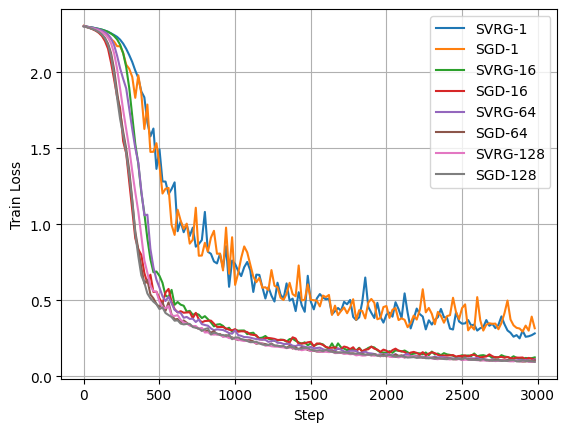

In [62]:
track = [1,16,64,128]
step_loss =  np.array(list(range(3000)))
for i, b in enumerate(bs):
    if b in track:
        plt.plot(steps, mean_svrg[i], label = f"SVRG-{b}")
        #plt.fill_between(steps, ci_low_svrg[i], ci_up_svrg[i], alpha = 0.3)

        plt.plot(steps, mean_sgd[i], label = f"SGD-{b}")
        #plt.fill_between(steps, ci_low_sgd[i], ci_up_sgd[i], alpha = 0.3)
        plt.xlabel('Step')
        plt.ylabel('Train Loss')
plt.legend()
plt.grid()
plt.show()

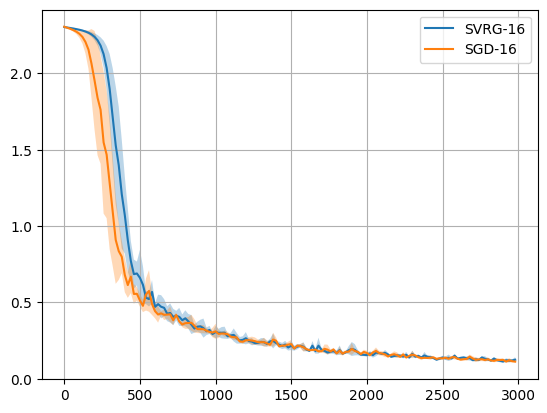

In [60]:
track = [16]
for i, b in enumerate(bs):
    if b in track:
        plt.plot(steps, mean_svrg[i], label = f"SVRG-{b}")
        plt.fill_between(steps, ci_low_svrg[i], ci_up_svrg[i], alpha = 0.3)

        plt.plot(steps, mean_sgd[i], label = f"SGD-{b}")
        plt.fill_between(steps, ci_low_sgd[i], ci_up_sgd[i], alpha = 0.3)

plt.legend()
plt.grid()
plt.show()

In [ ]:
key = "variances"
key_var_sgd = "variances_sgd"
step_var = np.array(list(range(3000)))

svrg_batch = []
for i, b in enumerate(bs):
    svrg = np.zeros(3000)
    svrg_sgd = np.zeros(3000)
    #svrg_temp = []

    for run in range(num_runs):

        svrg += np.array(results_svrg[i][run][key])[:,1]/5
        svrg_sgd += np.array(results_svrg[i][run][key_var_sgd])[:,1]/5

    mean = svrg = svrg/svrg_sgd
    svrg_batch.append(mean)




C:\Users\anton\AppData\Local\Temp\ipykernel_13640\965671753.py:16: RuntimeWarning: invalid value encountered in divide
  svrg = svrg/svrg_sgd


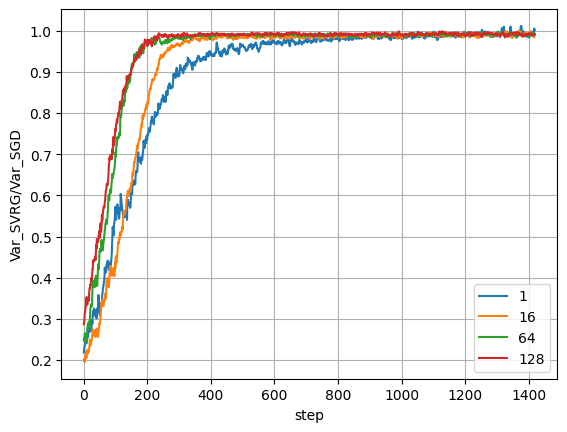

In [ ]:
track = [1,16,64,128]
for i, b in enumerate(bs):
    if b in track:
        plt.plot(np.arange(1420), svrg_batch[i][80:1500], label = b)
        plt.ylabel('Var_SVRG/Var_SGD')
        plt.xlabel('tep')

plt.legend()
plt.grid()
plt.show()